In [8]:
!pip install WordCloud seaborn plotly

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/19.1 MB 837.5 kB/s eta 0:00:23
   -- ------------------------------------- 1.0/19.1 MB 1.5 MB/s eta 0:00:13
   --- ------------------------------------ 1.6/19.1 MB 1.8 MB/s e

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

In [11]:
shop = pd.read_csv('shopping_trends_updated.csv')
shop.shape

(3900, 18)

In [12]:
shop.to_excel('shopping_trends_updated.xlsx')
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,20,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,40,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [13]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [14]:
print(f"The unique values of the 'Gender' column are: {shop['Gender'].unique()}")
print()
print(f"The unique values of the 'Category' column are: {shop['Category'].unique()}")
print()
print(f"The unique values of the 'Size' column are: {shop['Size'].unique()}")
print()
print(f"The unique values of the 'Subscription Status' column are: {shop['Subscription Status'].unique()}")
print()
print(f"The unique values of the 'Shipping Type' column are: {shop['Shipping Type'].unique()}")
print()
print(f"The unique values of the 'Discount Applied' column are: {shop['Discount Applied'].unique()}")
print()
print(f"The unique values of the 'Promo Code Used' column are: {shop['Promo Code Used'].unique()}")
print()
print(f"The unique values of the 'Payment Method' column are: {shop['Payment Method'].unique()}")

The unique values of the 'Gender' column are: ['Male' 'Female']

The unique values of the 'Category' column are: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']

The unique values of the 'Size' column are: ['L' 'S' 'M' 'XL']

The unique values of the 'Subscription Status' column are: ['Yes' 'No']

The unique values of the 'Shipping Type' column are: ['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']

The unique values of the 'Discount Applied' column are: ['Yes' 'No']

The unique values of the 'Promo Code Used' column are: ['Yes' 'No']

The unique values of the 'Payment Method' column are: ['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']


# Additional Questions and Solutions for EDA - Shopping Trends Analysis


# Q 1: What are the most common product categories purchased by different age groups?


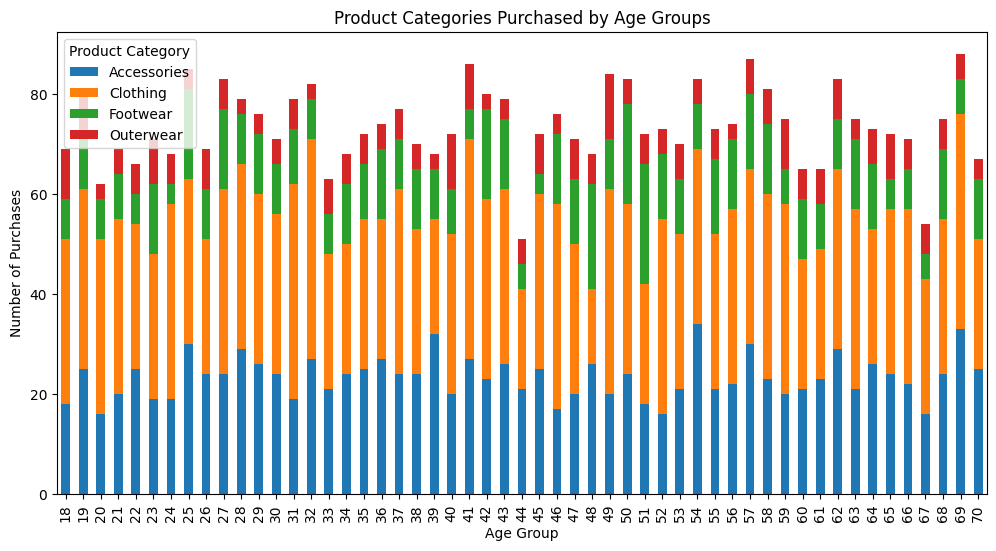

In [17]:
age_group_categories = shop.groupby(['Age', 'Category']).size().unstack().fillna(0)
age_group_categories.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Product Categories Purchased by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Purchases')
plt.legend(title='Product Category')
plt.show()

# Q 2: What is the average spending per customer?

In [22]:
average_spending = shop.groupby('Customer ID')['Purchase Amount (USD)'].mean()
print("Average Spending per Customer:")
print(average_spending)

Average Spending per Customer:
Customer ID
1       20.0
2       64.0
3       73.0
4       90.0
5       49.0
        ... 
3896    28.0
3897    49.0
3898    33.0
3899    77.0
3900    81.0
Name: Purchase Amount (USD), Length: 3900, dtype: float64


# Q 3: Which payment methods are preferred by customers?

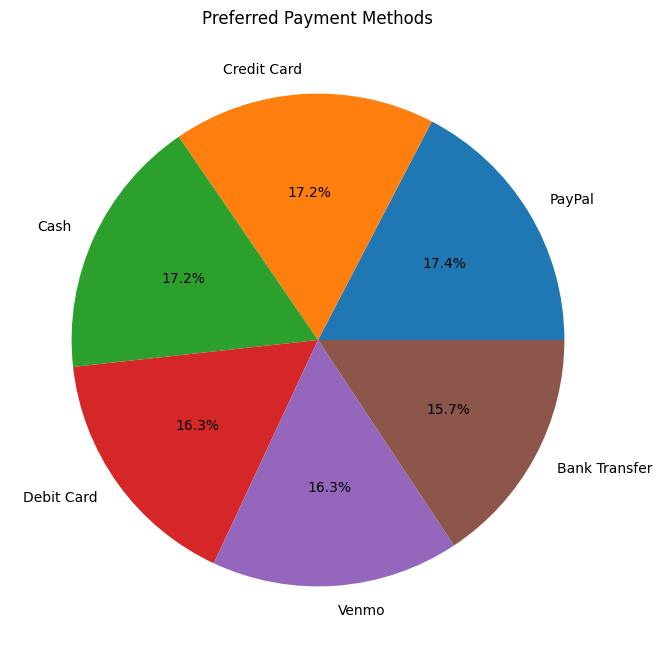

In [25]:
payment_preferences = shop['Payment Method'].value_counts()
payment_preferences.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Preferred Payment Methods')
plt.ylabel('')
plt.show()

# Q 4: Are there significant differences in spending between genders?

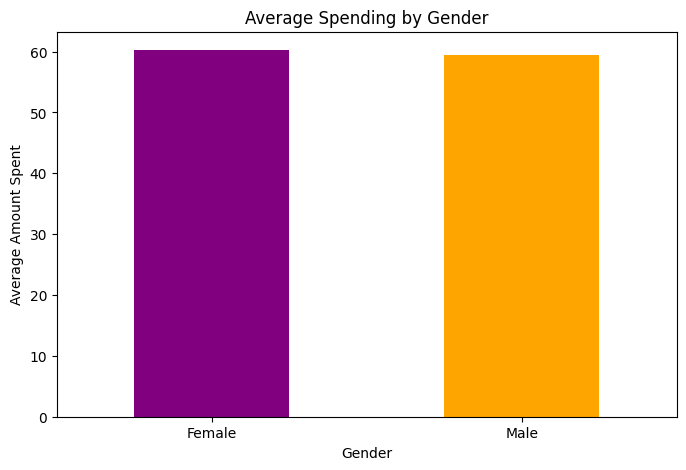

In [27]:
gender_spending = shop.groupby('Gender')['Purchase Amount (USD)'].mean()
gender_spending.plot(kind='bar', color=['purple', 'orange'], figsize=(8, 5))
plt.title('Average Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Amount Spent')
plt.xticks(rotation=0)
plt.show()

# Q 5: What are the most common product categories purchased in each season?


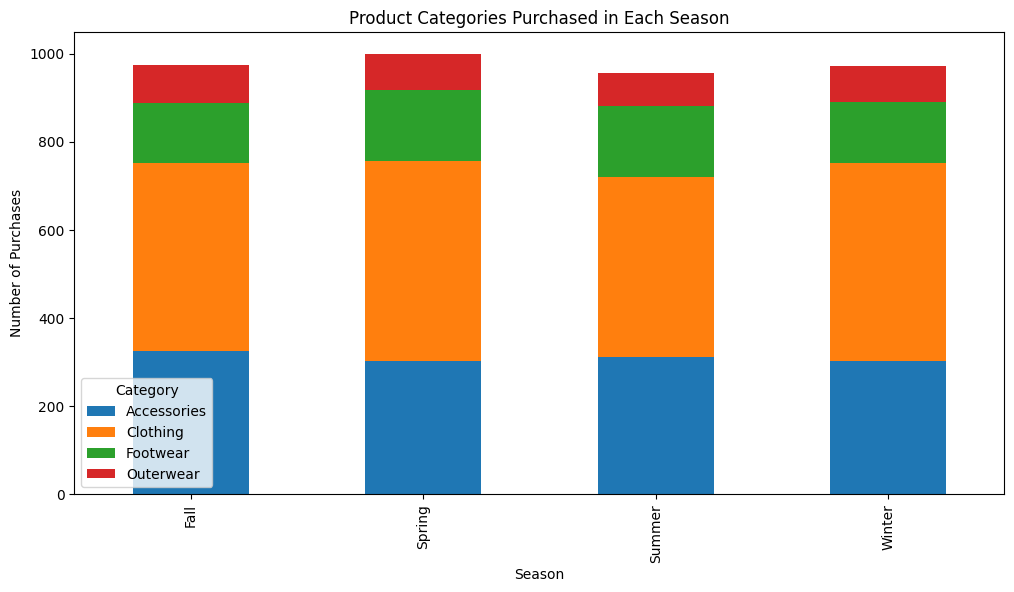

In [28]:
season_category = shop.groupby(['Season', 'Category']).size().unstack().fillna(0)
season_category.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Product Categories Purchased in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Purchases')
plt.legend(title='Category')
plt.show()


# Q 6: How does the discount application impact purchase amount?

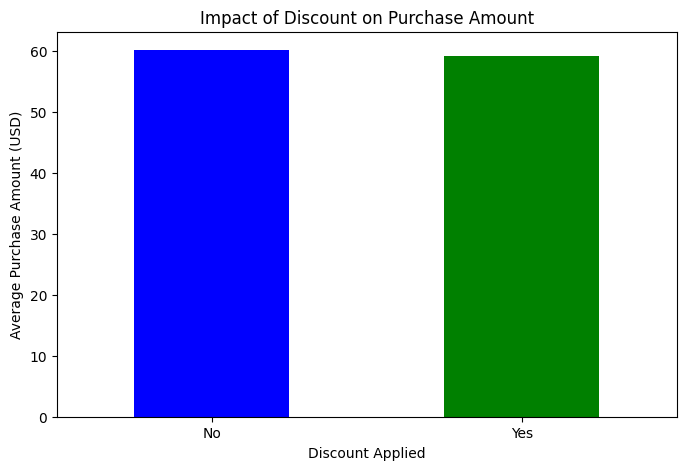

In [29]:
discount_impact = shop.groupby('Discount Applied')['Purchase Amount (USD)'].mean()
discount_impact.plot(kind='bar', color=['blue', 'green'], figsize=(8, 5))
plt.title('Impact of Discount on Purchase Amount')
plt.xlabel('Discount Applied')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=0)
plt.show()


# Q 7: What is the relationship between review rating and frequency of purchases?


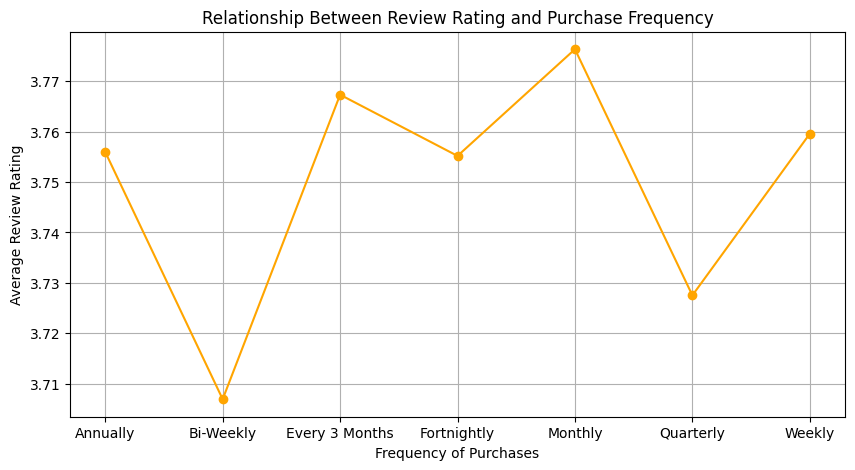

In [31]:
rating_frequency = shop.groupby('Frequency of Purchases')['Review Rating'].mean()
rating_frequency.plot(kind='line', marker='o', figsize=(10, 5), color='orange')
plt.title('Relationship Between Review Rating and Purchase Frequency')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Average Review Rating')
plt.grid()
plt.show()

# Q 8: Which subscription status group spends the most?


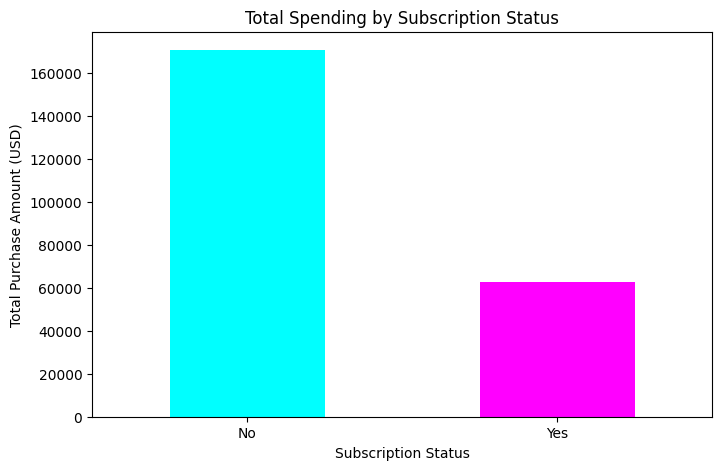

In [32]:
subscription_spending = shop.groupby('Subscription Status')['Purchase Amount (USD)'].sum()
subscription_spending.plot(kind='bar', color=['cyan', 'magenta'], figsize=(8, 5))
plt.title('Total Spending by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=0)
plt.show()

# Q 9: What is the distribution of purchases across locations?


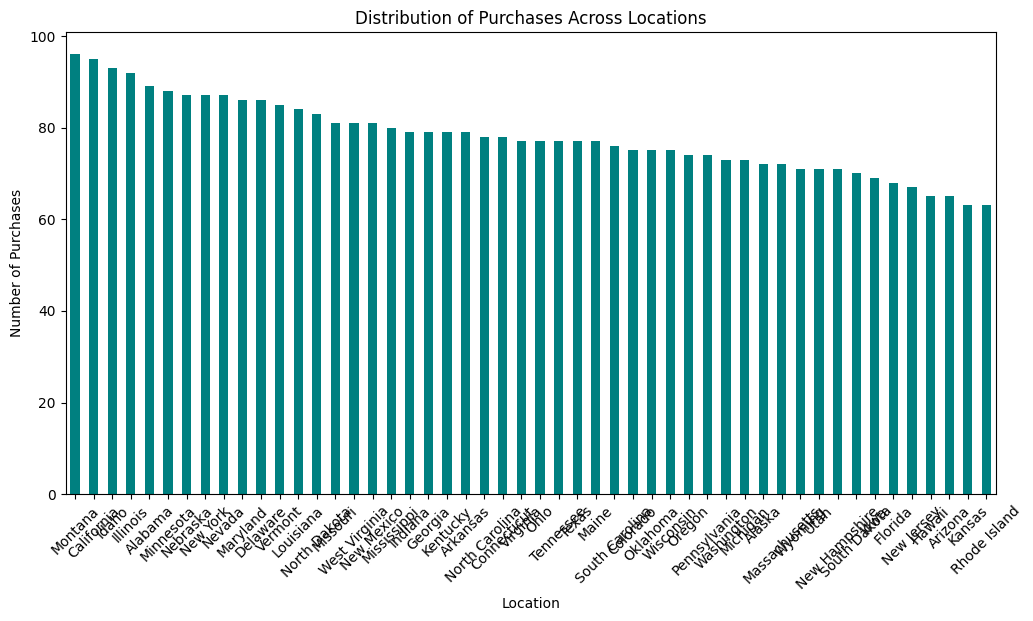

In [33]:
location_distribution = shop['Location'].value_counts()
location_distribution.plot(kind='bar', color='teal', figsize=(12, 6))
plt.title('Distribution of Purchases Across Locations')
plt.xlabel('Location')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

# Q 10: Are there any notable trends in purchases based on size and color?


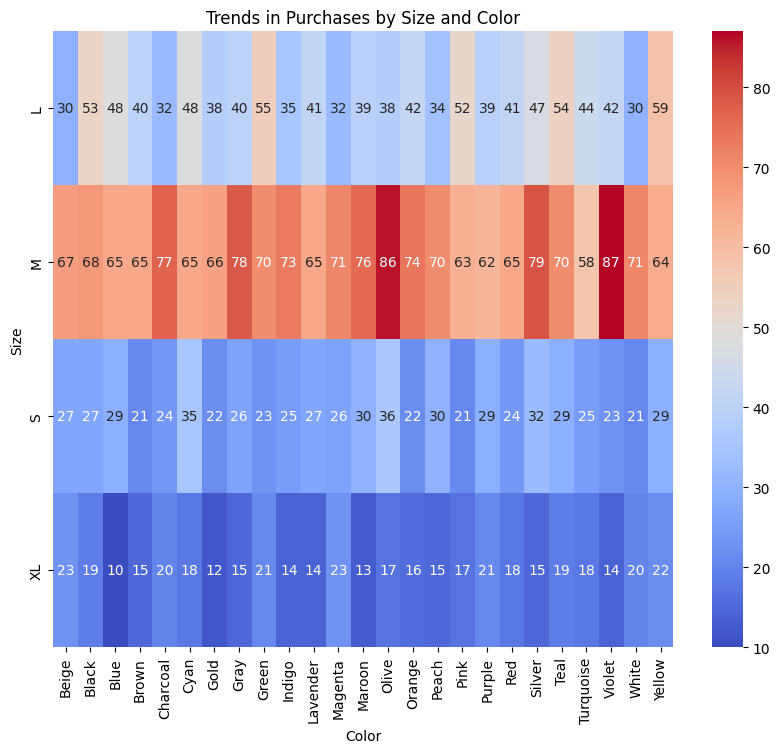

In [35]:
size_color_trends = shop.groupby(['Size', 'Color']).size().unstack().fillna(0)
plt.figure(figsize=(10, 8))
sns.heatmap(size_color_trends, annot=True, fmt="g", cmap="coolwarm")
plt.title('Trends in Purchases by Size and Color')
plt.xlabel('Color')
plt.ylabel('Size')
plt.show()

# Q 11: Which age group has the highest average spending?


C:\Users\PUNIT\AppData\Local\Temp\ipykernel_32864\1723878007.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spending = shop.groupby('Age Group')['Purchase Amount (USD)'].mean()


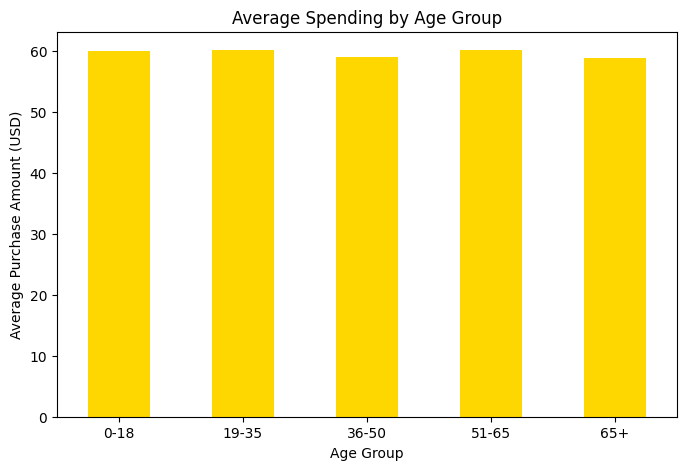

In [36]:
shop['Age Group'] = pd.cut(shop['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])
age_spending = shop.groupby('Age Group')['Purchase Amount (USD)'].mean()
age_spending.plot(kind='bar', color='gold', figsize=(8, 5))
plt.title('Average Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=0)
plt.show()

# Q 12: What is the average review rating for each product category?


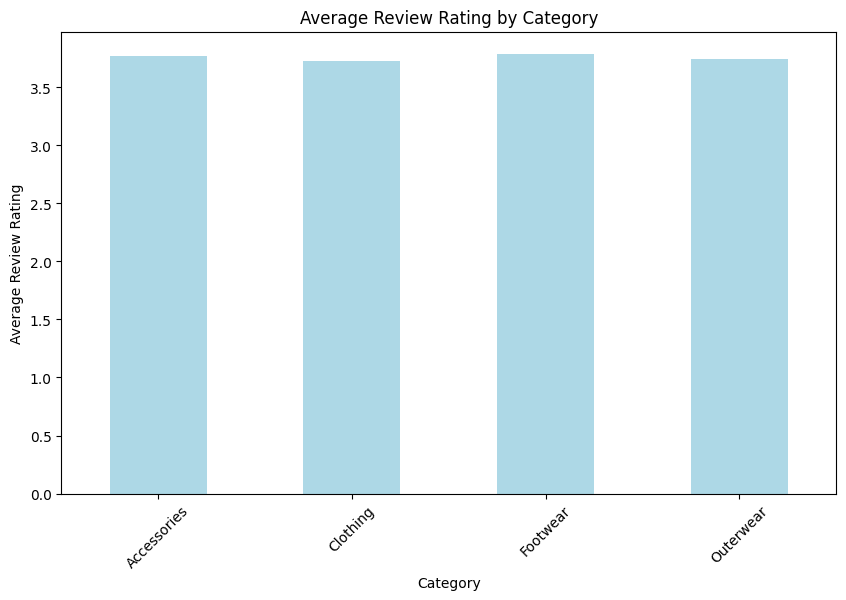

In [37]:
category_rating = shop.groupby('Category')['Review Rating'].mean()
category_rating.plot(kind='bar', color='lightblue', figsize=(10, 6))
plt.title('Average Review Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Review Rating')
plt.xticks(rotation=45)
plt.show()

# Q 13: How often do customers use promo codes?


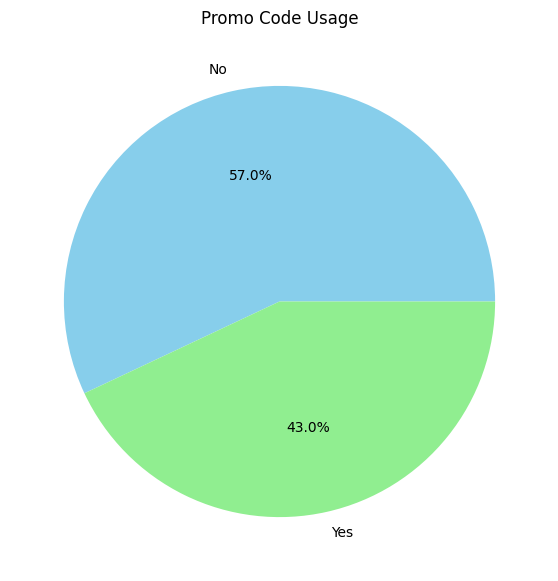

In [38]:
promo_usage = shop['Promo Code Used'].value_counts()
promo_usage.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], figsize=(7, 7))
plt.title('Promo Code Usage')
plt.ylabel('')
plt.show()

# Q 14: Are there any significant differences in purchase amounts between shipping types?


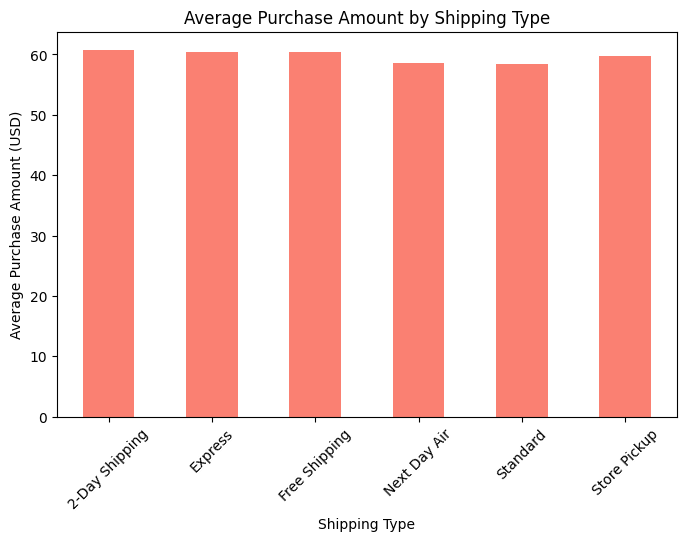

In [39]:
shipping_analysis = shop.groupby('Shipping Type')['Purchase Amount (USD)'].mean()
shipping_analysis.plot(kind='bar', color='salmon', figsize=(8, 5))
plt.title('Average Purchase Amount by Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

# Question 15:# Q How does the average purchase amount vary across different seasons and payment methods?


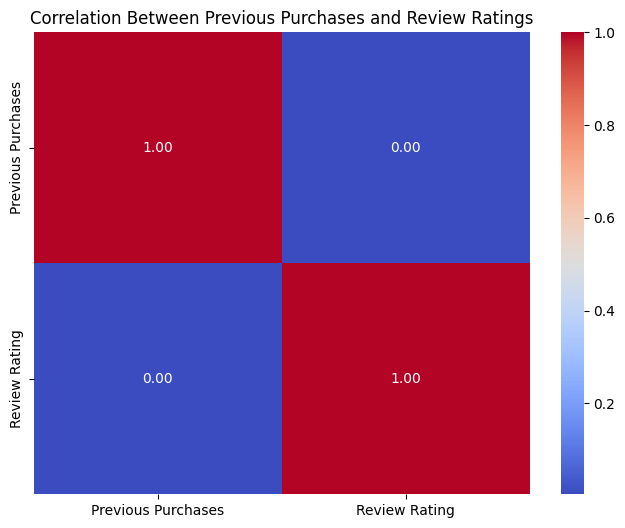

Correlation for No: -0.00
Correlation for Yes: 0.02


In [40]:
correlation_data = shop[['Previous Purchases', 'Review Rating']]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Previous Purchases and Review Ratings')
plt.show()

subscription_groups = shop.groupby('Subscription Status')
for status, group in subscription_groups:
    corr = group[['Previous Purchases', 'Review Rating']].corr().iloc[0, 1]
    print(f"Correlation for {status}: {corr:.2f}")